Most of the metrics that we discussed until now can be converted to a multi-class
version. The idea is quite simple. Let’s take precision and recall. We can calculate
precision and recall for each class in a **multi-class classification problem**.

There are three different ways to calculate this which might get confusing from time
to time. Let’s assume we are interested in precision first. We know that precision
depends on true positives and false positives.

- **Macro averaged precision**: calculate precision for all classes individually
and then average them


- **Micro averaged precision**: calculate class wise true positive and false
positive and then use that to calculate overall precision


- **Weighted precision**: same as macro but in this case, it is weighted average
depending on the number of items in each class

### Macro-averaged precision

In [37]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn
def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp
def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [38]:
import numpy as np
def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
        # calculate precision for current class
        temp_precision = tp / (tp + fp)
        # keep adding precision for all classes
        precision += temp_precision
        # calculate and return average precision over all classes
        precision /= num_classes
    return precision 

In [39]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [40]:
macro_precision(y_true, y_pred)

0.13888888888888887

In [41]:
from sklearn import metrics
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111

### Micro Averaged Precision

In [42]:
import numpy as np
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
        # calculate and return overall precision
        precision = tp / (tp + fp)
        return precision

In [44]:
micro_precision(y_true, y_pred)

0.75

In [45]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

### Weighted Precision

In [46]:
from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        # add to overall precision
        precision += weighted_precision
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [47]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [48]:
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814

Similarly, we can implement the recall metric for multi-class. Precision and recall
depend on true positive, false positive and false negative while F1 depends on
precision and recall.

In [56]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [57]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

### Weighted F1

In [58]:
from collections import Counter
import numpy as np
def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1 score
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted f1 score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize f1 to 0
    f1 = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        # add to f1 precision
        f1 += weighted_f1
        # calculate overall F1 by dividing by
        # total number of samples
        overall_f1 = f1 / len(y_true)
        return overall_f1

In [59]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
weighted_f1(y_true, y_pred)

0.2857142857142857

In [60]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

Thus, we have precision, recall and F1 implemented for multi-class problems. You
can similarly convert AUC and log loss to multi-class formats too. This format of
conversion is known as one-vs-all.

In binary or multi-class classification, it is also quite popular to take a look at
**confusion matrix**.

**Confusion matrix** gives an easy way to calculate different metrics that we have
discussed before. Scikit-learn offers an easy and straightforward way to generate a
confusion matrix.

Text(0.5, 50.5, 'Predicted Labels')

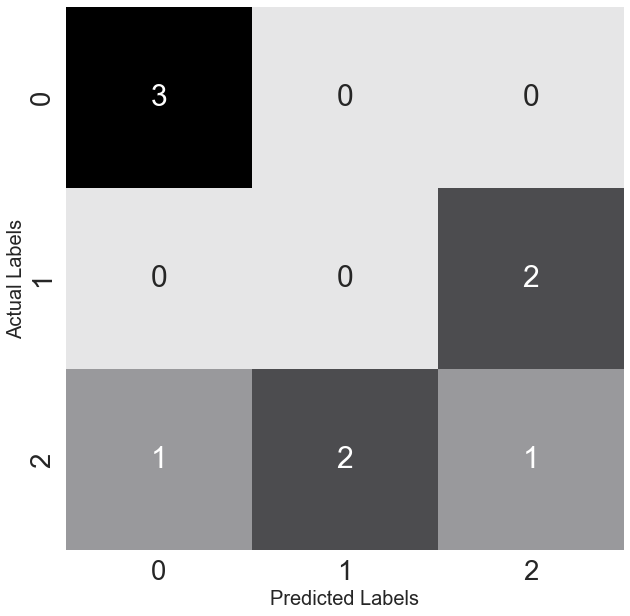

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)